In [1]:
import matplotlib.pyplot as plt
import csv, glob, os

In [2]:
problem_name = 'benchmark'
base_directory = '../report'

In [3]:
schemes = ['1_LSCHEME', '2_LSCHEME', 'NEWTON', 'PICARD']
directories = [os.path.join(base_directory, problem_name + '_' + scheme) for scheme in schemes]

In [4]:
scheme_dictionary = {}
scheme_iterations = {}
scheme_time = {}

In [5]:
for directory in directories:
    files = glob.glob(os.path.join(directory, '*_' + problem_name +'*.csv'))
    
    scheme = directory.replace(os.path.join(base_directory, problem_name + '_'), '')
    scheme_dictionary[scheme] = []

    print('Pattern ' + os.path.join(directory, '*_' + problem_name +'*.csv') + ' matched with ' + str(len(files)) + ' files of scheme ' + scheme)

    for file in files:
        scheme_dictionary[scheme].append( file )
    
    scheme_dictionary[scheme].sort()

Pattern ../report/benchmark_1_LSCHEME/*_benchmark*.csv matched with 8 files of scheme 1_LSCHEME
Pattern ../report/benchmark_2_LSCHEME/*_benchmark*.csv matched with 8 files of scheme 2_LSCHEME
Pattern ../report/benchmark_NEWTON/*_benchmark*.csv matched with 8 files of scheme NEWTON
Pattern ../report/benchmark_PICARD/*_benchmark*.csv matched with 8 files of scheme PICARD


In [6]:
for scheme in scheme_dictionary:
    scheme_iterations[scheme] = []

    for file in scheme_dictionary[scheme]:
        with open(file, 'r') as csvfile:
            lines = csv.reader(csvfile, delimiter=',')
            scheme_iterations[scheme].append(sum(1 for row in lines))

            print('Scheme ' + scheme + ' has ' + str(scheme_iterations[scheme][-1]) + ' iterations!')

Scheme 1_LSCHEME has 62 iterations!
Scheme 1_LSCHEME has 64 iterations!
Scheme 1_LSCHEME has 64 iterations!
Scheme 1_LSCHEME has 64 iterations!
Scheme 1_LSCHEME has 64 iterations!
Scheme 1_LSCHEME has 64 iterations!
Scheme 1_LSCHEME has 64 iterations!
Scheme 1_LSCHEME has 64 iterations!
Scheme 2_LSCHEME has 72 iterations!
Scheme 2_LSCHEME has 73 iterations!
Scheme 2_LSCHEME has 72 iterations!
Scheme 2_LSCHEME has 72 iterations!
Scheme 2_LSCHEME has 72 iterations!
Scheme 2_LSCHEME has 73 iterations!
Scheme 2_LSCHEME has 73 iterations!
Scheme 2_LSCHEME has 73 iterations!
Scheme NEWTON has 33 iterations!
Scheme NEWTON has 33 iterations!
Scheme NEWTON has 33 iterations!
Scheme NEWTON has 33 iterations!
Scheme NEWTON has 33 iterations!
Scheme NEWTON has 33 iterations!
Scheme NEWTON has 33 iterations!
Scheme NEWTON has 33 iterations!
Scheme PICARD has 63 iterations!
Scheme PICARD has 63 iterations!
Scheme PICARD has 62 iterations!
Scheme PICARD has 62 iterations!
Scheme PICARD has 62 iterati

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


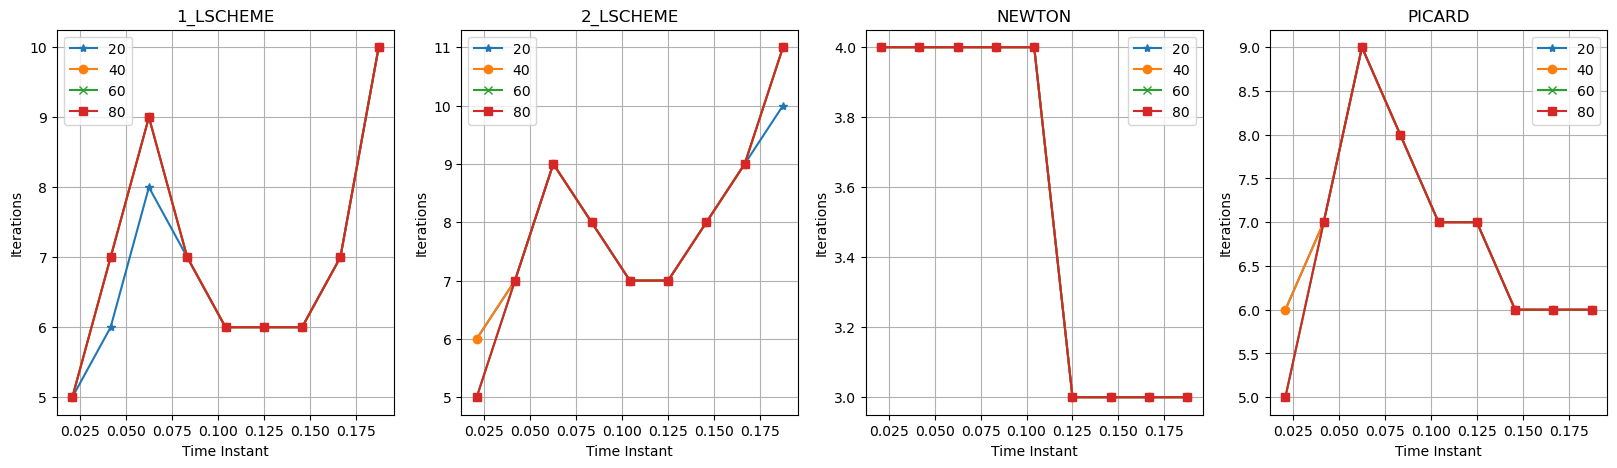

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=len(scheme_dictionary), figsize=(5 * len(scheme_dictionary), 5))
symbols = ['-*', '-o', '-x', '-s']

i = 0
for scheme_name in scheme_dictionary:
    ax[i].set_title(scheme_name)

    tss = []
    counters = []

    for j in range(4):
        tss.append([])
        counters.append([])

        res_plot = []

        with open(scheme_dictionary[scheme_name][j], 'r') as csvfile:
            lines = csv.reader(csvfile, delimiter=',')
            next(lines)

            for line in lines:
                res_plot.append([])
                for val in line:
                    res_plot[-1].append(float(val))
        


        tss[-1].append(res_plot[0][0])
        counters[-1].append(0)
        for row in res_plot:
            if tss[-1][-1] == row[0]:
                counters[-1][-1] = counters[-1][-1] + 1
            else:

                tss[-1].append( row[0] )
                counters[-1].append( 1 )
    
    for ts, counter, symbol in zip(tss, counters, symbols):
        ax[i].plot(ts, counter, symbol)
    ax[i].legend(['20', '40', '60', '80'])
    ax[i].set_ylabel('Iterations')
    ax[i].set_xlabel('Time Instant')
    ax[i].grid()
    
    i = i + 1

plt.savefig('mesh_comparison.eps', format='eps')